In [ ]:
%matplotlib inline

In [1]:
import os
from PIL import Image, ImageEnhance
import numpy as np
from torchvision import transforms
from collections import defaultdict
import shutil
import torchvision.transforms as T
from torchvision import models, datasets
from torch.utils.data import DataLoader
import random
import time
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split
from sklearn.metrics import classification_report, confusion_matrix
import time
from sklearn.metrics import accuracy_score, classification_report
import torch.optim as optim
import torchvision.models as models
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader, random_split
import seaborn as sns
import matplotlib.pyplot as plt



In [ ]:
import zipfile

zip_path = "/user/pgnanase/AlzheimerDataset.zip"
extract_to = "/user/pgnanase/alzheimer_dataset/"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

print("Extraction complete!")

Extraction complete!


In [ ]:
dataset_path = "/user/pgnanase/alzheimer_dataset/"

for root_file, directory, files in os.walk(dataset_path):
    print("Root:", root_file)
    print("Directories:", directory)
    print("Files:", files[:5])

image_classes = [os.path.join(dataset_path, folder) for folder in os.listdir(dataset_path)
                 if os.path.isdir(os.path.join(dataset_path, folder))]

print("Found folders:", image_classes)

Root: /user/pgnanase/alzheimer_dataset/
Directories: ['Mild Dementia', 'Moderate Dementia', 'Non Demented', 'Very mild Dementia']
Files: []
Root: /user/pgnanase/alzheimer_dataset/Mild Dementia
Directories: []
Files: ['OAS1_0028_MR1_mpr-1_100.jpg', 'OAS1_0028_MR1_mpr-1_101.jpg', 'OAS1_0028_MR1_mpr-1_102.jpg', 'OAS1_0028_MR1_mpr-1_103.jpg', 'OAS1_0028_MR1_mpr-1_104.jpg']
Root: /user/pgnanase/alzheimer_dataset/Moderate Dementia
Directories: []
Files: ['OAS1_0308_MR1_mpr-1_100.jpg', 'OAS1_0308_MR1_mpr-1_101.jpg', 'OAS1_0308_MR1_mpr-1_102.jpg', 'OAS1_0308_MR1_mpr-1_103.jpg', 'OAS1_0308_MR1_mpr-1_104.jpg']
Root: /user/pgnanase/alzheimer_dataset/Non Demented
Directories: []
Files: ['OAS1_0001_MR1_mpr-1_100.jpg', 'OAS1_0001_MR1_mpr-1_101.jpg', 'OAS1_0001_MR1_mpr-1_102.jpg', 'OAS1_0001_MR1_mpr-1_103.jpg', 'OAS1_0001_MR1_mpr-1_104.jpg']
Root: /user/pgnanase/alzheimer_dataset/Very mild Dementia
Directories: []
Files: ['OAS1_0003_MR1_mpr-1_100.jpg', 'OAS1_0003_MR1_mpr-1_101.jpg', 'OAS1_0003_MR1_mp

# Diplaying Sample Images from the 4 Alzheimer Types

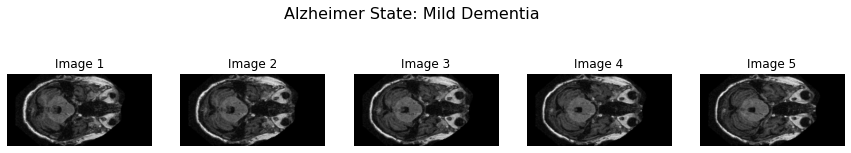

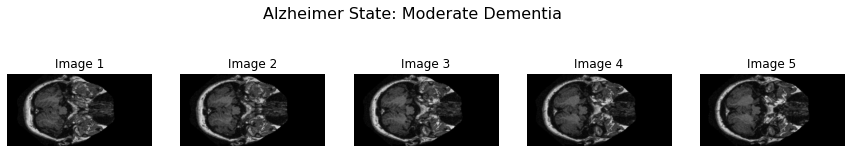

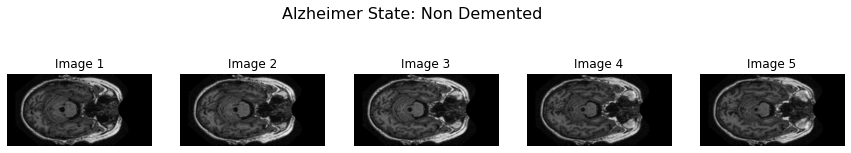

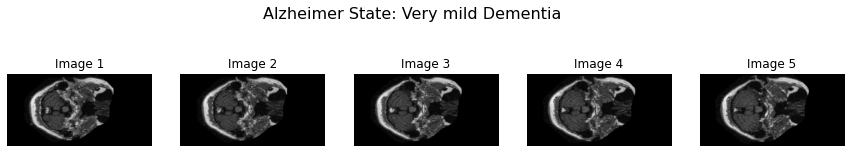

In [ ]:
for folder in image_classes:
    images = [f for f in os.listdir(folder) if f.lower().endswith('.jpg')]
    images = images[:5]

    plt.figure(figsize=(15, 3))
    plt.suptitle(f"Alzheimer State: {os.path.basename(folder)}", fontsize=16)

    for cnt, image_name in enumerate(images):
        image_location = os.path.join(folder, image_name)
        img = Image.open(image_location)

        plt.subplot(1, 5, cnt + 1)
        plt.imshow(img)
        plt.axis("off")
        plt.title(f"Image {cnt+1}")

    plt.show()

Plotting Pixel intensity for Each Image Class

<Figure size 1080x216 with 0 Axes>

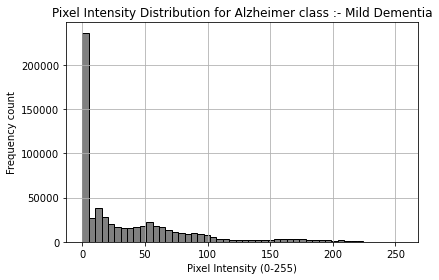

<Figure size 1080x216 with 0 Axes>

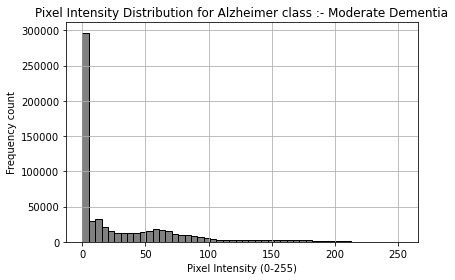

<Figure size 1080x216 with 0 Axes>

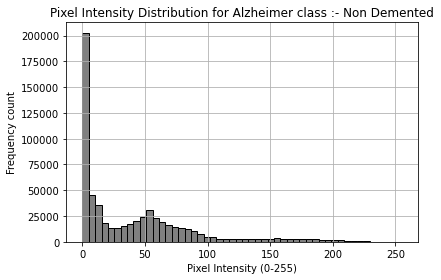

<Figure size 1080x216 with 0 Axes>

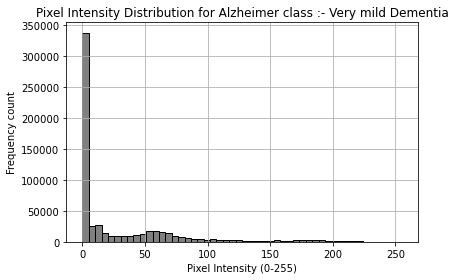

In [ ]:
for folder in image_classes:
    class_name = os.path.basename(folder)
    image_files = [f for f in os.listdir(folder) if f.lower().endswith('.jpg')]
    image_files = image_files[:5]

    plt.figure(figsize=(15, 3))
    plt.suptitle(f"Alzheimer State: {class_name} - Sample Class Images", fontsize=16)

    pixel_intensity_values = []
    for image_name in image_files:
        image_location = os.path.join(folder, image_name)
        img = Image.open(image_location).convert("L")
        pixel_intensity_values.extend(np.array(img).flatten())

    plt.figure(figsize=(6, 4))
    plt.hist(pixel_intensity_values, bins=50, color='gray', edgecolor='black')
    plt.title(f"Pixel Intensity Distribution for Alzheimer class :- {class_name}")
    plt.xlabel("Pixel Intensity (0-255)")
    plt.ylabel("Frequency count")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [ ]:
class_image_counts = defaultdict(int)
image_sizes = []

for folder in image_classes:
    class_name = os.path.basename(folder)
    for image_name in os.listdir(folder):
        if image_name.lower().endswith('.jpg'):
            img_location = os.path.join(folder, image_name)
            class_image_counts[class_name] += 1

            try:
                with Image.open(img_location) as img:
                    image_sizes.append(img.size)
            except:
                print(f"Could not open image: {img_location}")

total_images = sum(class_image_counts.values())

widths, heights = zip(*image_sizes)
mean_size = (np.mean(widths), np.mean(heights))
min_size = (np.min(widths), np.min(heights))
max_size = (np.max(widths), np.max(heights))

print("ALZEIMER DATASET SUMMARY")
print("---------------------")
print(f"Total images  Count    : {total_images}")
print(f"Number of Alzeimer classes : {len(class_image_counts)}")
print("Images per Alzeimer class  :")
for class_name, count in class_image_counts.items():
    print(f"  - {class_name}: {count} images")

print("\nImage Size Info")
print(f"Average Image size      : {mean_size[0]:.1f} x {mean_size[1]:.1f}")
print(f"Min Image size          : {min_size[0]} x {min_size[1]}")
print(f"Max Image size          : {max_size[0]} x {max_size[1]}")


ALZEIMER DATASET SUMMARY
---------------------
Total images  Count    : 86437
Number of Alzeimer classes : 4
Images per Alzeimer class  :
  - Mild Dementia: 5002 images
  - Moderate Dementia: 488 images
  - Non Demented: 67222 images
  - Very mild Dementia: 13725 images

Image Size Info
Average Image size      : 496.0 x 248.0
Min Image size          : 496 x 248
Max Image size          : 496 x 248


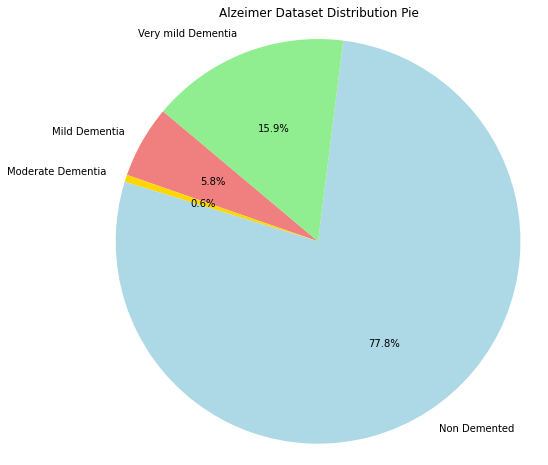

In [ ]:
labels = list(class_image_counts.keys())
sizes = list(class_image_counts.values())
colors = ['lightcoral', 'gold', 'lightblue', 'lightgreen']

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title("Alzeimer Dataset Distribution Pie")
plt.axis('equal')
plt.show()


# Upsampling Minority classes

In [ ]:
target__class_count = 10000
augmentation_classes = ["Moderate Dementia", "Mild Dementia"]

augmentation_transformation = transforms.Compose([
    transforms.RandomRotation(10),
    transforms.RandomHorizontalFlip(),
    transforms.ColorJitter(brightness=0.2, contrast=0.2),
])

def augment_image(img):
    return augmentation_transformation(img)

for folder in image_classes:
    class_name = os.path.basename(folder)

    if class_name in augmentation_classes:
        existing_images = [f for f in os.listdir(folder) if f.lower().endswith('.jpg')]
        current_count = len(existing_images)

        print(f"Augmenting Alzeimer Class Images for '{class_name}': {current_count} → {target__class_count}")
        image_cnt = 0

        while len(os.listdir(folder)) < target__class_count:
            image_name = existing_images[image_cnt % current_count]
            image_loc = os.path.join(folder, image_name)

            with Image.open(image_loc) as img:
                img = img.convert("RGB")

                aug_img = augment_image(img)

                aug_img_name = f"aug_{image_cnt}_{image_name}"
                aug_img_path = os.path.join(folder, aug_img_name)
                aug_img.save(aug_img_path)

            image_cnt += 1

print("Data augmentation process completed.")

Augmenting Alzeimer Class Images for 'Mild Dementia': 5002 → 10000
Augmenting Alzeimer Class Images for 'Moderate Dementia': 488 → 10000
Data augmentation process completed.


# Splitting dataset

In [ ]:
dataset_path = "/user/pgnanase/alzheimer_dataset/"
labelled_path = "/user/pgnanase/alzheimer_dataset_labelled"
unlabelled_path = "/user/pgnanase/alzheimer_dataset_unlabelled"


os.makedirs(labelled_path, exist_ok=True)
os.makedirs(unlabelled_path, exist_ok=True)
random.seed(42)

for class_name in os.listdir(dataset_path):
    class_folder_path = os.path.join(dataset_path, class_name)
    if not os.path.isdir(class_folder_path):
        continue

    image_files = [f for f in os.listdir(class_folder_path) if f.lower().endswith('.jpg')]
    random.shuffle(image_files)

    labelled_files = image_files[:450]
    unlabelled_files = image_files[450:]

    labelled_class_path = os.path.join(labelled_path, class_name)
    os.makedirs(labelled_class_path, exist_ok=True)

    for fname in labelled_files:
        src = os.path.join(class_folder_path, fname)
        dst = os.path.join(labelled_class_path, fname)
        shutil.copy2(src, dst)

    for fname in unlabelled_files:
        src = os.path.join(class_folder_path, fname)
        dst = os.path.join(unlabelled_path, f"{class_name.replace(' ', '_')}_{fname}")
        shutil.copy2(src, dst)

print("Data split completed.")


Data split completed.


In [ ]:
labelled_path = "/user/pgnanase/alzheimer_dataset_labelled"
unlabelled_path = "/user/pgnanase/alzheimer_dataset_unlabelled"

In [ ]:
print("Dataset after Splitting into Labelled and Unlabelled images")
print("LABELLED DATASET")
print("-----------------")

for class_name in os.listdir(labelled_path):
    class_folder = os.path.join(labelled_path, class_name)
    if os.path.isdir(class_folder):
        num_images = len([f for f in os.listdir(class_folder) if f.lower().endswith('.jpg')])
        print(f"  - {class_name}: {num_images} images")

unlabelled_images = [f for f in os.listdir(unlabelled_path) if f.lower().endswith('.jpg')]

print("\nUNLABELLED DATASET")
print("-------------------")
print(f"Total unlabelled images: {len(unlabelled_images)}")


Dataset after Splitting into Labelled and Unlabelled images
LABELLED DATASET
-----------------
  - Mild Dementia: 450 images
  - Moderate Dementia: 450 images
  - Non Demented: 450 images
  - Very mild Dementia: 450 images

UNLABELLED DATASET
-------------------
Total unlabelled images: 99147


# BASE MODEL: Resnet

In [ ]:
class ResidualBlock(nn.Module):
    def __init__(self, in_channels, out_channels, stride=1, downsample=False):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels, out_channels, 1, stride=stride, bias=False)
        self.bn1   = nn.BatchNorm2d(out_channels)
        self.conv2 = nn.Conv2d(out_channels, out_channels, 3, stride=1, padding=1, bias=False)
        self.bn2   = nn.BatchNorm2d(out_channels)
        self.conv3 = nn.Conv2d(out_channels, out_channels*4, 1, bias=False)
        self.bn3   = nn.BatchNorm2d(out_channels*4)
        self.relu  = nn.ReLU(inplace=True)
        self.downsample = None
        if downsample:
            self.downsample = nn.Sequential(
                nn.Conv2d(in_channels, out_channels*4, 1, stride=stride, bias=False),
                nn.BatchNorm2d(out_channels*4),
            )
    def forward(self, x):
        identity = x if self.downsample is None else self.downsample(x)
        out  = self.relu(self.bn1(self.conv1(x)))
        out  = self.relu(self.bn2(self.conv2(out)))
        out  =        self.bn3(self.conv3(out))
        out += identity
        return self.relu(out)

In [ ]:
class ResNet50(nn.Module):
    def __init__(self, num_classes=4):
        super().__init__()
        self.in_channels = 64
        self.conv1 = nn.Conv2d(3, 64, 7, stride=2, padding=3, bias=False)
        self.bn1   = nn.BatchNorm2d(64)
        self.relu  = nn.ReLU(inplace=True)
        self.maxp  = nn.MaxPool2d(3, stride=2, padding=1)
        self.layer1 = self._make_layer(64, 3)
        self.layer2 = self._make_layer(128, 4, stride=2)
        self.layer3 = self._make_layer(256, 6, stride=2)
        self.layer4 = self._make_layer(512, 3, stride=2)
        self.avgp   = nn.AdaptiveAvgPool2d((1,1))
        self.fc     = nn.Linear(512*4, num_classes)
    def _make_layer(self, out_channels, blocks, stride=1):
        layers = [ResidualBlock(self.in_channels, out_channels, stride, downsample=True)]
        self.in_channels = out_channels*4
        for _ in range(1, blocks):
            layers.append(ResidualBlock(self.in_channels, out_channels))
        return nn.Sequential(*layers)
    def forward(self, x):
        x = self.relu(self.bn1(self.conv1(x)))
        x = self.maxp(x)
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)
        x = self.avgp(x)
        x = torch.flatten(x, 1)
        return self.fc(x)

# Base Model : PreTraining Using MoCo

In [2]:
class MoCoTransform:
    def __init__(self):
        self.transform = T.Compose([
            T.Resize((128, 128)),
            T.RandomResizedCrop(size=128),
            T.RandomHorizontalFlip(),
            T.RandomApply([T.ColorJitter(0.4, 0.4, 0.4, 0.1)], p=0.8),
            T.RandomGrayscale(p=0.2),
            T.ToTensor(),
            T.Normalize((0.5,) * 3, (0.5,) * 3),
        ])
    def __call__(self, x):
        return self.transform(x), self.transform(x)

In [3]:
from torch.utils.data import Dataset
from PIL import Image
import os

class FlatUnlabeledDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.image_paths = [
            os.path.join(root_dir, f)
            for f in os.listdir(root_dir)
            if f.lower().endswith('.jpg')
        ]
    def __len__(self):
        return len(self.image_paths)
    def __getitem__(self, idx):
        img = Image.open(self.image_paths[idx]).convert("RGB")
        if self.transform:
            return self.transform(img)
        return img

In [4]:
from torchvision.models.vision_transformer import VisionTransformer, vit_b_16

class MoCoV3(nn.Module):
    def __init__(self, projection_dim=256, temperature=0.07):
        super().__init__()
        self.backbone = VisionTransformer(
            image_size=128,
            patch_size=16,
            num_layers=12,
            num_heads=12,
            hidden_dim=768,
            mlp_dim=3072,
            dropout=0.1,
            attention_dropout=0.1,
            num_classes=768
        )
        self.backbone.heads = nn.Identity()
        self.projector = nn.Sequential(
            nn.Linear(768, 2048),
            nn.BatchNorm1d(2048),
            nn.ReLU(),
            nn.Linear(2048, projection_dim)
        )
        self.T = temperature

    def forward(self, x1, x2):
        z1 = self.projector(self.backbone(x1))
        z2 = self.projector(self.backbone(x2))
        z1 = F.normalize(z1, dim=1)
        z2 = F.normalize(z2, dim=1)
        logits = torch.matmul(z1, z2.T) / self.T
        labels = torch.arange(z1.size(0), device=z1.device)
        return logits, labels


In [5]:
transform = MoCoTransform()
unlabelled_dataset = FlatUnlabeledDataset(unlabelled_path, transform=transform)
unlabelled_loader  = DataLoader(unlabelled_dataset,batch_size=128,shuffle=True,num_workers=4,drop_last=True)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
moco_model = MoCoV3().to(device)
optimizer = torch.optim.AdamW(moco_model.parameters(), lr=3e-4, weight_decay=1e-4)

In [16]:
from torchinfo import summary

dummy_input = (torch.randn(2, 3, 128, 128).to(device), torch.randn(2, 3, 128, 128).to(device))
summary(moco_model, input_data=dummy_input, depth=3, col_names=["input_size", "output_size", "num_params"])

Layer (type:depth-idx)                                  Input Shape               Output Shape              Param #
MoCoV3                                                  [2, 3, 128, 128]          [2, 2]                    --
├─VisionTransformer: 1-1                                [2, 3, 128, 128]          [2, 768]                  768
│    └─Conv2d: 2-1                                      [2, 3, 128, 128]          [2, 768, 8, 8]            590,592
│    └─Encoder: 2-2                                     [2, 65, 768]              [2, 65, 768]              49,920
│    │    └─Dropout: 3-1                                [2, 65, 768]              [2, 65, 768]              --
│    │    └─Sequential: 3-2                             [2, 65, 768]              [2, 65, 768]              85,054,464
│    │    └─LayerNorm: 3-3                              [2, 65, 768]              [2, 65, 768]              1,536
│    └─Identity: 2-3                                    [2, 768]                  [2, 

In [ ]:
epochs = 25
for epoch in range(epochs):
    unsupervised_train_rwd=[]
    moco_model.train()
    total_loss = 0
    for im1, im2 in unlabelled_loader:
        im1, im2 = im1.to(device), im2.to(device)
        logits, labels = moco_model(im1, im2)
        loss = F.cross_entropy(logits, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    unsupervised_train_rwd.append(total_loss / len(unlabelled_loader))
    print(f"Epoch [{epoch+1}/{epochs}]  Loss: {total_loss / len(unlabelled_loader):.4f}")

torch.save(moco_model.backbone.state_dict(), "moco_vit_encoder.pth")

Epoch [1/25]  Loss: 3.0564
Epoch [2/25]  Loss: 2.5123
Epoch [3/25]  Loss: 2.1130
Epoch [4/25]  Loss: 1.8211
Epoch [5/25]  Loss: 1.6238
Epoch [6/25]  Loss: 1.4707
Epoch [7/25]  Loss: 1.3508
Epoch [8/25]  Loss: 1.2439
Epoch [9/25]  Loss: 1.1448
Epoch [10/25]  Loss: 1.0671
Epoch [11/25]  Loss: 1.0115
Epoch [12/25]  Loss: 0.9468
Epoch [13/25]  Loss: 0.9006
Epoch [14/25]  Loss: 0.8607
Epoch [15/25]  Loss: 0.8245
Epoch [16/25]  Loss: 0.7821
Epoch [17/25]  Loss: 0.7475
Epoch [18/25]  Loss: 0.7173
Epoch [19/25]  Loss: 0.6965
Epoch [20/25]  Loss: 0.6608
Epoch [21/25]  Loss: 0.6422
Epoch [22/25]  Loss: 0.6157
Epoch [23/25]  Loss: 0.6081
Epoch [24/25]  Loss: 0.5819
Epoch [25/25]  Loss: 0.5629


In [ ]:
moco_model.backbone.load_state_dict(torch.load("moco_vit_encoder.pth", map_location=device))

<All keys matched successfully>


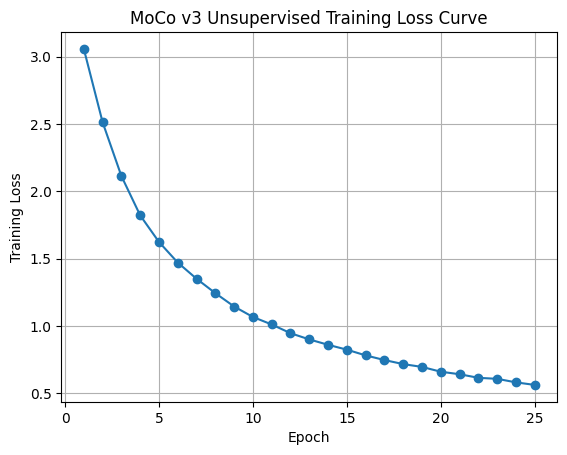

In [13]:
plt.plot(range(1, 26), unsupervised_train_rwd, marker='o')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.title('MoCo v3 Unsupervised Training Loss Curve')
plt.grid()
plt.show()


# Training on labelled Dataset

# Fine Tuning Pre-Trained model

In [ ]:
eval_transform = transforms.Compose([
    transforms.Resize((128,128)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,)*3, (0.5,)*3),
])
full_ds = datasets.ImageFolder(labelled_path, transform=eval_transform)
n = len(full_ds)
train_ds, val_ds, test_ds = random_split(full_ds, [int(0.7*n), int(0.15*n), n-int(0.85*n)],generator=torch.Generator().manual_seed(42))
train_loader = DataLoader(train_ds, batch_size=64, shuffle=True,  num_workers=2)
val_loader   = DataLoader(val_ds,   batch_size=64, shuffle=False, num_workers=2)
test_loader  = DataLoader(test_ds,  batch_size=64, shuffle=False, num_workers=2)

Defining Train,Evaluation, Confusion Matrix Functions

[01/100] Train: loss=1.2384, acc=46.03% | Val: loss=1.0913, acc=54.07%
[02/100] Train: loss=0.9547, acc=67.30% | Val: loss=0.9619, acc=66.30%
[03/100] Train: loss=0.8197, acc=75.79% | Val: loss=0.8576, acc=71.11%
[04/100] Train: loss=0.7222, acc=80.71% | Val: loss=0.8393, acc=72.59%
[05/100] Train: loss=0.6889, acc=83.02% | Val: loss=0.7898, acc=77.04%
[06/100] Train: loss=0.6239, acc=86.67% | Val: loss=0.7996, acc=73.33%
[07/100] Train: loss=0.6079, acc=87.54% | Val: loss=0.8068, acc=72.96%
[08/100] Train: loss=0.5710, acc=88.65% | Val: loss=0.7607, acc=77.41%
[09/100] Train: loss=0.5802, acc=88.97% | Val: loss=0.7460, acc=76.67%
[10/100] Train: loss=0.5158, acc=92.70% | Val: loss=0.7558, acc=78.89%
[11/100] Train: loss=0.5099, acc=92.78% | Val: loss=0.7270, acc=80.37%
[12/100] Train: loss=0.4776, acc=93.97% | Val: loss=0.7305, acc=81.11%
[13/100] Train: loss=0.4808, acc=94.37% | Val: loss=0.7321, acc=79.63%
[14/100] Train: loss=0.4644, acc=95.00% | Val: loss=0.7214, acc=83.70%
[15/10

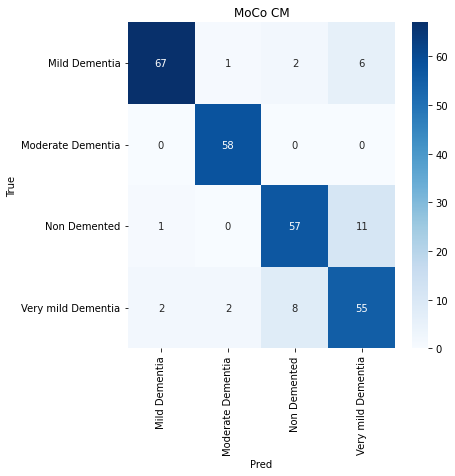

In [ ]:
eval_transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
    transforms.ToTensor(),
    transforms.Normalize((0.5,) * 3, (0.5,) * 3),
])

full_ds = datasets.ImageFolder(labelled_path, transform=eval_transform)
n = len(full_ds)
train_ds, val_ds, test_ds = random_split(full_ds, [int(0.7*n), int(0.15*n), n-int(0.85*n)], generator=torch.Generator().manual_seed(42))
train_loader = DataLoader(train_ds, batch_size=64, shuffle=True, num_workers=2)
val_loader   = DataLoader(val_ds, batch_size=64, shuffle=False, num_workers=2)
test_loader  = DataLoader(test_ds, batch_size=64, shuffle=False, num_workers=2)

class LinearClassifier(nn.Module):
    def __init__(self, encoder, feat_dim=768, num_classes=4):
        super().__init__()
        self.encoder = encoder
        self.fc = nn.Linear(feat_dim, num_classes)
    def forward(self, x):
        z = self.encoder(x)
        return self.fc(z)


enc = VisionTransformer(image_size=128, patch_size=16,
                        num_layers=12, num_heads=12,
                        hidden_dim=768, mlp_dim=3072,
                        dropout=0.1, attention_dropout=0.1,
                        num_classes=768)
enc.heads = nn.Identity()
enc.load_state_dict(torch.load("moco_vit_encoder.pth", map_location=device))
enc.to(device).train()

model_clf = LinearClassifier(encoder=enc).to(device)
criterion = nn.CrossEntropyLoss(label_smoothing=0.1)
opt_clf  = torch.optim.AdamW(model_clf.parameters(), lr=1e-4, weight_decay=1e-4)
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(opt_clf, T_max=100)

train_losses=[]
train_accs=[]

def train_epoch(model, loader):
    model.train(); L, C, T = 0, 0, 0
    for imgs, lbls in loader:
        imgs, lbls = imgs.to(device), lbls.to(device)
        out = model(imgs); loss = criterion(out, lbls)
        opt_clf.zero_grad(); loss.backward(); opt_clf.step()
        L += loss.item()*imgs.size(0)
        preds = out.argmax(1); C += (preds == lbls).sum().item(); T += lbls.size(0)
    scheduler.step()
    return L/T, C/T*100

val_losses=[]
val_accs=[]
def eval_epoch(model, loader):
    model.eval(); L, C, T = 0, 0, 0; all_p, all_l = [], []
    with torch.no_grad():
        for imgs, lbls in loader:
            imgs, lbls = imgs.to(device), lbls.to(device)
            out = model(imgs); loss = criterion(out, lbls)
            L += loss.item()*imgs.size(0)
            preds = out.argmax(1); C += (preds == lbls).sum().item(); T += lbls.size(0)
            all_p += preds.cpu().tolist(); all_l += lbls.cpu().tolist()
    return L/T, C/T*100, all_p, all_l

for e in range(1, 101):
    tr_L, tr_A = train_epoch(model_clf, train_loader)
    train_losses.append(tr_L)
    train_accs.append(tr_A)
    vL, vA, _, _ = eval_epoch(model_clf, val_loader)
    val_losses.append(vL)
    val_accs.append(vA)
    print(f"[{e:02d}/100] Train: loss={tr_L:.4f}, acc={tr_A:.2f}% | Val: loss={vL:.4f}, acc={vA:.2f}%")

tL, tA, preds, labs = eval_epoch(model_clf, test_loader)
print(f"\nTest Loss: {tL:.4f}, Test Acc: {tA:.2f}%")
print(classification_report(labs, preds, target_names=full_ds.classes))

cm = confusion_matrix(labs, preds)
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=full_ds.classes, yticklabels=full_ds.classes, cmap='Blues')
plt.xlabel("Pred"); plt.ylabel("True"); plt.title("MoCo CM")
plt.show()


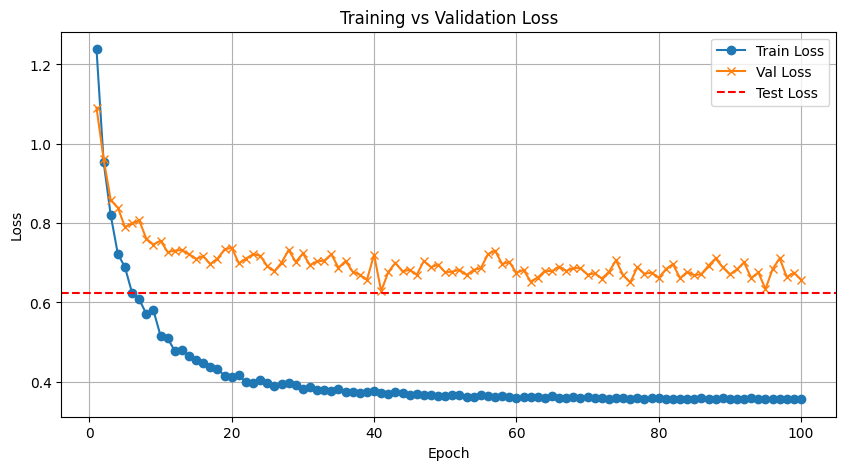

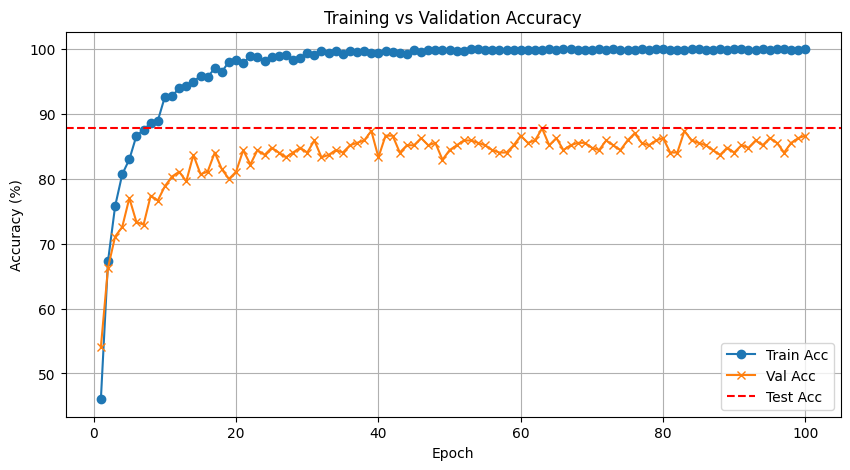

In [15]:
epochs = range(1, 101)

plt.figure(figsize=(10,5))
plt.plot(epochs, train_losses, label='Train Loss', marker='o')
plt.plot(epochs, val_losses, label='Val Loss', marker='x')
plt.axhline(tL, color='red', linestyle='--', label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(10,5))
plt.plot(epochs, train_accs, label='Train Acc', marker='o')
plt.plot(epochs, val_accs, label='Val Acc', marker='x')
plt.axhline(tA, color='red', linestyle='--', label='Test Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.grid()
plt.show()

# Evaluation Summary

We can see from the table below that performing supervised learning over the representations learned from unsupervised set of images using Moco model performs better then that of Resnet50 model trained on the same set of images ie 450 images per class.

We can see that the accuracy of Resnet model is less than that of self-supervised model as it is not able to learn the representations from smaller set of images.


<table >
    <tr>
        <th > Model <th>
        <th> Test Accuracy <th>
        <th> Test Loss <th>
        <th> Precision <th>
        <th> Recall <th>
        <th> F1 Score <th>
    <tr>
    <tr>
        <td> Base ResNet50 Model <td>
        <td> 74.44% <td>
        <td> 1.1514 <td>
        <td> 0.7835 <td>
        <td> 0.7528 <td>
        <td> 0.7419 <td>
    <tr>
    <tr>
        <td> Moco V3 preTrianed-FineTuned Model<td>
        <td> 88.00% <td>
        <td> 0.8800 <td>
        <td> 0.8800 <td>
        <td> 0.8800 <td>
        <td> 0.8800 <td>

<table>
   

# Goals

1) Training Self-Supervised models like BYOL, MoCo, etc and finetuning models to get Better accuracy

2) Utilizing the pretrained models to be used for other disease detection involving MRI scans, like tumors.

# References

1)[2309.13167] Flow Factorized Representation Learning

2)[2301.05712] A Survey on Self-supervised Learning: Algorithms, Applications, and Future Trends

3)Self-Supervised Representation Learning | Lil'Log

4)https://arxiv.org/pdf/1512.03385

5)https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

6)https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

